<link rel="stylesheet" type="text/css" href="../Style/style.css">

# **Análisis exploratorio de la base de datos de la línea 144** 
-----------------------------

Autor: Gonzalo Gabriel Ramirez  
Fecha: 24/6/2023  
Fuente: [Ministerio de las Mujeres, Géneros y Diversidad de la Nación - Dirección Técnica de Registros y Bases de Datos.](https://www.datos.gob.ar/dataset/generos-base-datos-linea-144)  


### 1. **Introducción**
----------------
En el año 2013 se creó en la República Argentina la línea 144. Dicha línea de comunicación telefónica nace con la intención de cumplir los objetivos establecidos por la Ley 26.845, artículo 9. 
Su tarea es la de brindar atención, contención y asesoramiento a mujeres y LGTBI+ en situación de violencia de género.
Su equipo interdisciplinario está compuesto por profesionales de las áreas del derecho, la psicología, el trabajo social y otras áreas afines con capacitación en perspectiva de género,según informa [el sitio web oficial del Gobierno de la República Argentina](https://www.argentina.gob.ar/generos/linea-144).

Nuestra tarea en este análisis será manipular y presentar en gráficos estos datos para responder a distintas cuestiones acerca de la línea 144. Como por ejemplo *¿cúal es la distribución de las provincias de residencia de las personas que denuncian algún tipo de violencia?* o *¿cuál es la edad media de las personas que denuncian sufrir violencia de género en cualquiera de sus tipos?*. Éstas y otras cuestiones serán presentadas, analizadas y respondidas en base a la información que nuestro dataframe nos ofrece. 

### 2. **El dataframe**
----------------
Nuestro dataframe es el resultado de la concatenación de 4 archivos de tipo '.csv' provisto por el sitio web [Datos.gob.ar](https://www.datos.gob.ar/dataset/generos-base-datos-linea-144). Cada archivo '.csv' responde al período 2020, 2021, 2022 y al primer trimestre del 2023 respectivamente. La sumatoria de estos 4 periodos nos dá como resultado **84.861 observaciones** y 18 variables: 
- **fecha:** - ISO-8601 (date) - Fecha del ingreso de la consulta.
- **prov_residencia_persona_en_situacion_violencia:** - Texto (string) - Provincia en donde la persona en situación de violencia declara estar residiendo al momento de la consulta.
- **genero_persona_en_situacion_de_violencia:** - Texto (string) - Identidad de género autopercibida de la persona en situación de violencia.
- **edad_persona_en_situacion_de_violencia Texto** - Texto (string) - Edad declarada de la persona en situación de violencia al momento en que se ingresó la consulta.
- **pais_nacimiento_persona_en_situacion_de_violencia** - Texto (string) - País de nacimiento de la persona en situación de violencia.
- **tipo_de_violencia_fisica** - Texto (string) - Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta.
- **tipo_de_violencia_psicologica** - Texto (string) - Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta.
- **tipo_de_violencia_sexual** - Texto (string) - Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta.
- **tipo_de_violencia_economica_y_patrimonial** - Texto (string) - Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta.
- **tipo_de_violencia_simbolica Texto** - Texto (string) - Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta.
- **tipo_de_violencia_domestica** - Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_de_violencia_institucional** - Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_de_violencia_laboral** - Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_violencia_contra_libertad_reproductiva** Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_de_violencia_obstetrica** - Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_de_violencia_mediatica** - Texto (string) - Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron.
- **modalidad_de_violencia_otras** - Texto (string) - Categoría “Otras modalidades” para dejar registro de la presencia de otras modalidades distintas a las mencionadas (por ejemplo, violencia política, acoso callejero).
- **vinculo_con_la_persona_agresora** - Texto (string) - Vínculo que tiene o tenía la persona en situación de violencia con quien ejerce la agresión en el momento en que sucedieron las situaciones de violencia declaradas.
- **genero_de_la_persona_agresora** - Texto (string) - Identidad de género de la persona agresora.

Mediante la manipulación de los datos con la librería *pandas* se logró reunir y almacenar en una sola variable llamada *df* la totalidad de los registros de los cuatros periodos en cuestión, de la cual se desprenderá las distintas operaciones necesarias para responder cada una de las preguntas que abordaremos en este análisis.

Cabe destacar que nuestro dataframe presenta valores nulos en más de una variable. Todos los valores nulos fueron oportunamente sustituidos por la leyenda "Missing" que nos indica que ese valor no fue cargado desde su origen y se tendrá en cuenta para su descarte de acuerdo a la necesidad del momento o de la pregunta a responder.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Cargamos CSV**

In [2]:
df_2020 = pd.read_csv("../Dataframes/linea144-2020.csv")
df_2021 = pd.read_csv("../Dataframes/linea144-2021.csv")
df_2022 = pd.read_csv("../Dataframes/linea144-2022.csv")
df_2023 = pd.read_csv("../Dataframes/linea144-2023.csv")

In [3]:
df_2022.pop(df_2022.columns[-1])
df_2022 = df_2022.rename(columns={
    'Fecha': 'fecha'
})

df_2023 = df_2023.rename(columns={
    'Fecha': 'fecha'
})

dataframes = [df_2020, df_2021, df_2022, df_2023]
df         = pd.concat(dataframes, ignore_index=True)
df         = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83660 entries, 0 to 84860
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   fecha                                              83660 non-null  object 
 1   prov_residencia_persona_en_situacion_violencia     82441 non-null  object 
 2   genero_persona_en_situacion_de_violencia           81901 non-null  object 
 3   edad_persona_en_situacion_de_violencia             68028 non-null  float64
 4   pais_nacimiento_persona_en_situacion_de_violencia  55586 non-null  object 
 5   tipo_de_violencia_fisica                           83660 non-null  object 
 6   tipo_de_violencia_psicologica                      83660 non-null  object 
 7   tipo_de_violencia_sexual                           83660 non-null  object 
 8   tipo_de_violencia_economica_y_patrimonial          83660 non-null  object 
 9   tipo_de_vio

In [5]:
df_edades = df['edad_persona_en_situacion_de_violencia'].value_counts()

In [6]:
df_edades = pd.DataFrame({'Edad': df_edades.index, 'Conteo': df_edades.values})
df_edades = df_edades.sort_values(by='Edad', ascending=True)

In [7]:
df_edades.head()

,Edad,Conteo
92,1.0,4
88,2.0,7
84,3.0,14
78,4.0,19
79,5.0,19


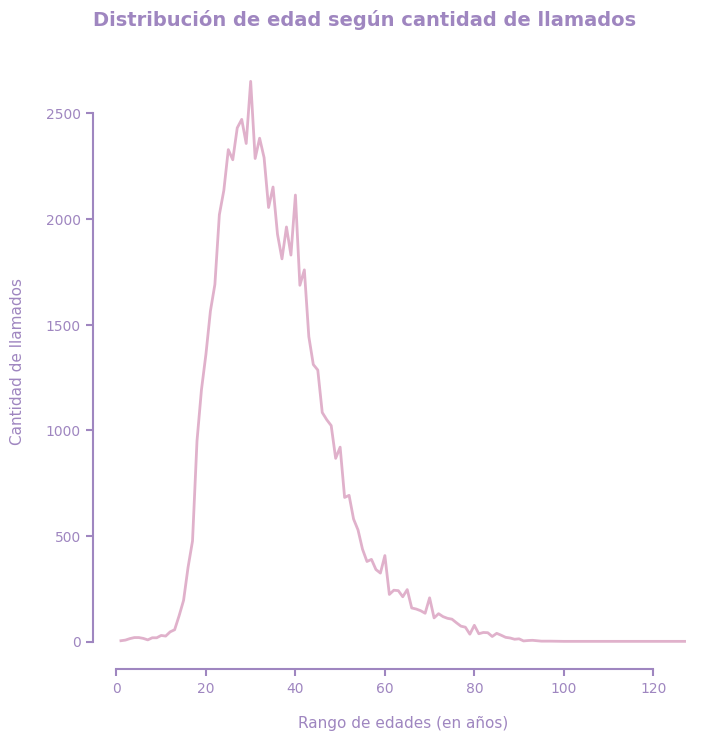

In [28]:
plt.figure(figsize=(8,8))

sns.lineplot(data=df_edades,
            x='Edad', y='Conteo',
            linewidth=2,
            color='#e0b1cb')

ax = plt.gca()
ax.spines['bottom'].set_color('#9f86c0')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('#9f86c0')
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(axis='x', which='both', color='#9f86c0', width=1.5, length=5, labelcolor='#9f86c0')
ax.tick_params(axis='y', which='both', color='#9f86c0', width=1.5, length=5, labelcolor='#9f86c0')
ax.set_ylabel('Cantidad de llamados', color='#9f86c0', labelpad=15, size=11)
ax.set_xlabel('Rango de edades (en años)', color='#9f86c0', labelpad=15, size=11)

plt.title('Distribución de edad según cantidad de llamados',
         color='#9f86c0',
         fontsize=14,
         fontweight='bold',
         loc='left',
         pad=20)

sns.despine(trim=True)
plt.show()